In [41]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, utils
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics 

In [2]:
data = pd.read_csv("Credit Card Transactions.csv")

In [3]:
data.shape

(5000, 23)

In [4]:
data.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1


In [5]:
data = data.drop(['Customer_ID', 'Count'], axis=1)
data.columns

Index(['Status_Checking_Acc', 'Duration_in_Months', 'Credit_History',
       'Purposre_Credit_Taken', 'Credit_Amount', 'Savings_Acc',
       'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans', 'Housing',
       'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [6]:
data[data==0].count()

Status_Checking_Acc               0
Duration_in_Months                0
Credit_History                    0
Purposre_Credit_Taken             0
Credit_Amount                     0
Savings_Acc                       0
Years_At_Present_Employment       0
Inst_Rt_Income                    0
Marital_Status_Gender             0
Other_Debtors_Guarantors          0
Current_Address_Yrs               0
Property                          0
Age                               0
Other_Inst_Plans                  0
Housing                           0
Num_CC                            0
Job                               0
Dependents                        0
Telephone                         0
Foreign_Worker                    0
Default_On_Payment             3505
dtype: int64

In [7]:
data.isnull().sum()

Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

In [8]:
data['Default_On_Payment'].value_counts()

0    3505
1    1495
Name: Default_On_Payment, dtype: int64

In [9]:
li = list(data[data.Default_On_Payment == 0].sample(n=2000).index)

In [10]:
data = data.drop(data.index[li])

data['Default_On_Payment'].value_counts()

0    1505
1    1495
Name: Default_On_Payment, dtype: int64

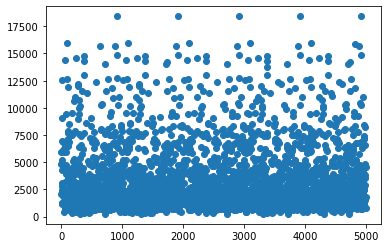

In [11]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['Credit_Amount'])

In [12]:
li = list(data['Credit_Amount'].sort_values()[-5:].index)

In [13]:
data['Credit_Amount'][li] = int(data.drop(li)['Credit_Amount'].mean())

<ipython-input-13-f53b663528cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit_Amount'][li] = int(data.drop(li)['Credit_Amount'].mean())


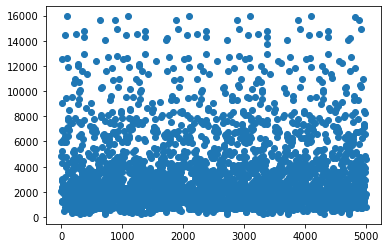

In [14]:
plt.scatter(data.index, data['Credit_Amount'])

In [15]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0


In [16]:
data.reset_index(drop=True,inplace=True)

In [17]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
2,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1
3,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,0
4,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,0


In [18]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [19]:
data.head()

,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,0
1,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
2,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
3,3,36,2,7,9055,4,2,2,2,0,...,3,35,2,2,1,1,2,1,0,0
4,3,24,2,3,2835,2,4,3,2,0,...,1,53,2,1,1,2,1,0,0,0


In [20]:
X = data.drop(['Default_On_Payment'], axis=1)
y = data['Default_On_Payment']

## Logistic Regression


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model using 'fit' method
model.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = model.predict(X_test)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.74      0.76       306
           1       0.75      0.80      0.77       294

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600



C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Print the Confusion Matrix
[[226  80]
 [ 60 234]]


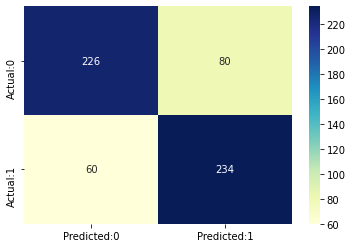

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Print the Confusion Matrix')
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

## Ridge and Lasso Regression

In [52]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       306
           1       0.75      0.80      0.77       294

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600



Print the Confusion Matrix
[[226  80]
 [ 60 234]]


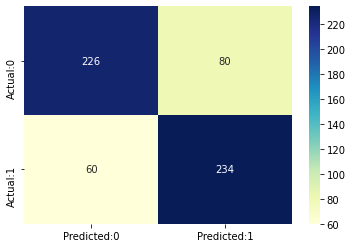

In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Print the Confusion Matrix')
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [54]:
from sklearn.linear_model import Lasso

## training the model

lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)
from sklearn.linear_model import Lasso

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       306
           1       0.75      0.80      0.77       294

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600



Print the Confusion Matrix
[[226  80]
 [ 60 234]]


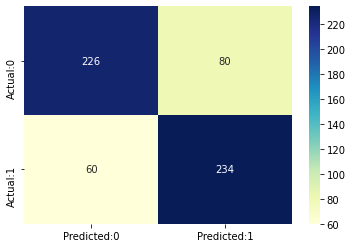

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Print the Confusion Matrix')
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

## Decision Tree

In [56]:
from sklearn import tree

model = tree.DecisionTreeClassifier() 
model.fit(X, y)
model.score(X, y)
#Predict Output
predicted= model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))
print(metrics.accuracy_score(predicted, y_test))
#print(predicted)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       294

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

1.0


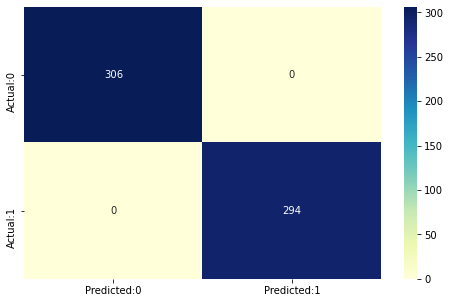

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
cm
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

## Random Forest

In [61]:
from sklearn import ensemble
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)

# predict the labels on validation dataset
predictions = classifier.predict(X_test)
metrics.accuracy_score(predictions, y_test)
print(metrics.accuracy_score(predicted, y_test))
#print(predictions)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


1.0
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       306
           1       0.96      1.00      0.98       294

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



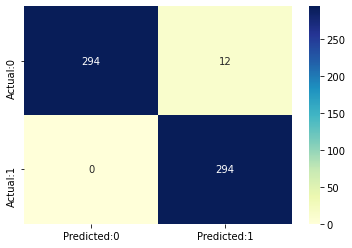

In [62]:
cm=confusion_matrix(y_test,predictions)
cm
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

## Naive Bayes

In [70]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(X_train, y_train) 

#Predict Output
predicted= model.predict(X_test)
print(metrics.accuracy_score(predicted, y_test))
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))


0.7316666666666667
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       303
           1       0.72      0.76      0.74       297

    accuracy                           0.73       600
   macro avg       0.73      0.73      0.73       600
weighted avg       0.73      0.73      0.73       600



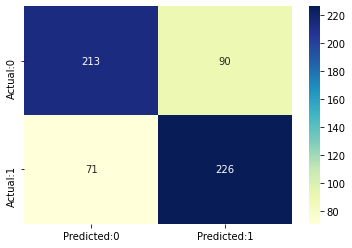

In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
cm
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

### Variance Inflation Factor

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).sort_values()

Other_Inst_Plans                1.046788
Marital_Status_Gender           1.067835
Purposre_Credit_Taken           1.075436
Foreign_Worker                  1.076737
Other_Debtors_Guarantors        1.087297
Savings_Acc                     1.107127
Dependents                      1.112206
Status_Checking_Acc             1.162961
Current_Address_Yrs             1.198360
Years_At_Present_Employment     1.219573
Num_CC                          1.232764
Inst_Rt_Income                  1.271454
Credit_History                  1.277290
Job                             1.310109
Telephone                       1.313157
Age                             1.315454
Housing                         1.326227
Property                        1.400150
Duration_in_Months              1.803908
Credit_Amount                   2.132274
const                          57.368038
dtype: float64

### Chi Square

In [64]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

Significance = pd.Series()

for i in X.columns:
    dfObserved = pd.crosstab(X[i],y)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    Significance[i] = p

Significance.sort_values()

<ipython-input-64-f23ffe156936>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Significance = pd.Series()


Credit_Amount                  1.581687e-201
Status_Checking_Acc            9.959880e-106
Duration_in_Months              3.735915e-42
Credit_History                  1.300395e-40
Savings_Acc                     1.288474e-33
Age                             7.012557e-23
Purposre_Credit_Taken           1.239452e-21
Property                        6.117589e-20
Housing                         1.291989e-14
Other_Inst_Plans                3.339781e-11
Years_At_Present_Employment     6.508008e-11
Foreign_Worker                  3.362406e-08
Marital_Status_Gender           4.579239e-06
Other_Debtors_Guarantors        5.285970e-06
Inst_Rt_Income                  3.139153e-04
Job                             7.128432e-02
Telephone                       7.868525e-02
Num_CC                          2.666545e-01
Current_Address_Yrs             6.926105e-01
Dependents                      8.182018e-01
const                           1.000000e+00
dtype: float64

### ANOVA

In [65]:
import scipy.stats as stats
stats.f_oneway(X['Credit_Amount'],y)

F_onewayResult(statistic=3972.5829792706427, pvalue=0.0)

In [66]:
stats.f_oneway(X['Age'],y)

F_onewayResult(statistic=28353.358404293886, pvalue=0.0)